# **Project Title** 
# Predicting KRW/USD Exchange Rates 1-year Ahead From Now 

# **Contents** 

- [Summary of Results](#Summary-of-Results)
  
- [Introduction](#Introduction)
    1. Background Ideas for Variable Selection
    2. Background Ideas for Model Selection - No ARIMA? No Machine Learning?
    3. Background Ideas for Selecting the Right Time Window<br><br>

- [Part I. Downloading and Loading Data from Bank of Korea, Federal Reserve, and World Bank](#Part-I.-Downloading-and-Loading-Data-from-Bank-of-Korea,-Federal-Reserve,-and-World-Bank)
    1. Downloading Exchange Rate and Other Macroeconomic Data from Bank of Korea Using Cumtom Functions
    2. Downloading Tresuary Term Spread Data from Federal Reserve
    3. Downloading PPP Exchange Rate Data from World Bank<br><br>

- [Part II. Data Preprocessing](#Part-II.-Data-Preprocessing)
    1. Merge, Resample, and Forward Fill the Datasets
    2. Calculate New Required Columns with Existing Columns: For Stationarity<br><br>

- [Part III. Modeling and Analysis of Model Result](#Part-III.-Modeling-and-Analysis-of-Model-Result)
    1. Take Necessary Columns for Modeling
    2. Correlation Matrix for Explanatory Variables
    3. OLS Regression with Overlapped Data<br><br>

- [Conclusion](#Conclusion)


### Acknowledgement

> This project was conducted as part of the KAIST DFMBA Financial Database course (Summer 2024), with a significant portion of the source code and project ideas based on the lectures of Professor Jaehoon Lee ([github link](https://github.com/dioscuroi)).

------

# Summary of Results

I have used OLS regression model to predict the exchange rate (KRW/USD) 1 year ahead.

Using the last observation of the exchange rate of **2024-08-12**, the point and interval estimates for the exchange rates are as follow:

> **The point estimate for the exchange rate around this time (August) next year is: KRW1,263.73/USD.**
>
> **The interval estimates for the exchange rate around this time (August) next year  for a given alpha level of 5% is: \
> KRW1015.03/USD ~ KRW1512.43/USD**

Below are the model specification and the main results:

**Model Sepcification**

$$
\begin{align*}
Y &= \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5 + \beta_6 X_6 + \beta_7 X_7 + \epsilon \\
\text{where:} \\
Y &\text{ is the the 12-month forward return of exchange rates} \\
X_1 &\text{ is the real exchange rate} \\
X_2 &\text{ is the current account of South Korea in relation to the size of its GDP} \\
X_3 &\text{ is the current account of the United States in relation to the size of its GDP} \\
X_4 &\text{ is the growth rate of real GDP of South Korea} \\
X_5 &\text{ is the difference between the inflation rates of South Korea and that of the United States} \\
X_6 &\text{ is the size of foreign reserve of South Korea in relation to the size of its GDP} \\
X_7 &\text{ is the term spread of Treasury yields (10Y - 3M)} \\
\beta_0 &\text{ is the intercept (constant term)} \\
\beta_1&, \beta_2, \dots, \beta_7 \text{ are the coefficients of the independent variables} \\
\epsilon& \text{ is the error term (residual)}
\end{align*}
$$

**Main Results**

\begin{array}{l c}
\textbf{R-squared:} & 0.304 \\
\textbf{Adj. R-squared:} & 0.287 \\
\end{array}

\begin{array}{l c c c c c}
\textbf{variable} &\textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P>|t|} & \textbf{[0.025  0.975]} \\
\hline
\text{const} & -26.4564 & 6.213 & -4.258 & 0.000 & [-38.685  -14.228] \\
X_1 & 66.3083 & 8.983 & 7.381 & 0.000 & [48.627  83.989] \\
X_2 & -1.3379 & 0.341 & -3.928 & 0.000 & [-2.008  -0.667] \\
X_3 & 1.1668 & 0.601 & 1.941 & 0.053 & [-0.016  2.350] \\
X_4 & 0.5115 & 0.210 & 2.440 & 0.015 & [0.102  0.921] \\
X_5 & -2.2369 & 0.418 & -5.349 & 0.000 & [-3.060  -1.414] \\
X_6 & -0.5961 & 0.213 & -2.798 & 0.006 & [-1.016  -0.176] \\
X_7 & 3.4080 & 1.830 & 1.862 & 0.064 & [-0.194  7.010] \\
\end{array}


---

# Introduction and Theoratical Backgrounds

I aim to build a model to predict the exchange rate (KRW/USD) one year ahead, based on macroeconomic data from South Korea and the United States, and to present both point estimates and interval estimates of the exchange rate one year later.

In the Introduction, I will explain the candidate explanatory variables I selected based on theories related to exchange rates. I will then describe why I choose to use a standard OLS regression model, instead of machine learning or ARIMA models. Finally, I will explain why I am going to use time series data from 1999 onwards, based on the unique characteristics of the Korean exchange rate regime.

## 1. Background Ideas for Variable Selection

The possible candidates for explanatory variables are selected based on various theories on economics and exchange rates. I will not go over the details of each theory assuming readers would be already well aware of them.

##### **Absolute PPP**

The formula for Absolute PPP is:

$$
\text{Absolute PPP: } S_{\text{KRW}/\text{USD}}^{ppp} = \frac{P_{\text{KR}}}{P_{\text{US}}}
$$

where:

- $S_{\text{KRW}/\text{USD}}^{ppp}$: PPP Exchange rate (KRW per USD)
- $P_{\text{KR}}$: Price level in South Korea
- $P_{\text{US}}$: Price level in the United States

Absolute PPP relies on assumption that eventually exchange rate will revert back to the level which makes internal purchasing power equals expternal purchasing power.

Relevant economic variable we could get out of Absolute PPP theory is:

- inflation data (cpi data)

##### **Relative PPP**

$$\text{Relative PPP: }  {S_{\text{KRW}/\text{USD}}}_{t+1}   = {S_{\text{KRW}/\text{USD}}}_{t} * \frac{1 + \pi_{\text{KR}}}{1 + \pi_{\text{US}}}$$


where:

- ${S_{\text{KRW}/\text{USD}}}_{t+1}$: Exchange rate (KRW per USD) at time `t+1`
- ${S_{\text{KRW}/\text{USD}}}_{t}$: Exchange rate (KRW per USD) at time `t`
- $\pi_\text{KR}$: inflation rate in South Korea
- $\pi_\text{US}$: inflation rate in the United States


Relative PPP relies on assumption that the current difference between PPP exchange rate and the market exchange rate will persist, at least for the time being. Then it can be deducted that market exchange rates are reflective of the difference in inflation rates between the two countries. 

Relevant economic variables we could get out of Relative PPP theory is:

- inflation data (cpi data)
- market exchange rates

##### **Real Exchange Rate**

$$\text{Real XR: }  \frac{{S_{\text{KRW}/\text{USD}}}^{ppp}}{{S_{\text{KRW}/\text{USD}}}} = \frac{\text{External PP}}{\text{Internal PP}}$$


where:

- $S_{\text{KRW}/\text{USD}}^{ppp}$: PPP Exchange rate (KRW per USD)
- ${S_{\text{KRW}/\text{USD}}}$: Market Exchange rate (KRW per USD)

Real exchange rate is the ratio of external purchasing power of KRW to the internal purchasing power. If we agree with the assumption that Real XR converges to `1`, then Real XR with over `1` (= overvalued KRW) would be followed by depreciation of the currency (= market exchange rate going up) and vice versa. 

Relevant economic variable we could get out of the concept of real exchange rate is:

- real exchange rate

##### **Fisher Equation & Fisher Relation**

\begin{align*}
\text{Fisher Equation: } & \quad i = r + \pi \\
\text{Implication of Fisher Equation on Purchasing Power: } & \quad \text{PP}_t = \frac{1}{P} \\
\text{PP}_{t+1} & = \frac{1(1+i)}{P(1+\pi)} = \text{PP}_t (1+r) \\
\text{Fisher Relation: } & i_{\text{KR}} - i_{\text{US}} = \pi_{\text{KR}} - \pi_{\text{US}}
\end{align*}

where:

- $i$: nominal interest rate
- $r$: real interest rate
- $\pi$: inflation rate
- $P$: price level

Fisher Equation is well accepted fact that the nominal interest rate can be borken down into real interest rate and inflation rate. The implication of the equation is that the purchasing power grows at a rate equal to the real interest rate. Furthermore, if we assume the real interest rates across different countries converge, Fisher Relation also holds.

Relevant economic variable we could get out of Fisher Equation and Fisher Relation:

- real interest rate
- interest rate difference
- inflation rate difference

##### **GDP**

GDP growth rates can influence exchange rate movements. Countries with rapidly growing GDPs generally have strong economies, making them attractive to foreign investors who are more likely to invest in the country's assets. This influx of investment increases the demand for the country's currency, which can subsequently raise its value.

Additionally, when economic growth is high, there is a higher likelihood that the central bank will raise interest rates, which can positively impact the value of the currency. Conversely, when economic growth is low, there is a higher likelihood of interest rate cuts, which can lead to a decline in the currency’s value.

Relevant economic variable we could get out of GDP:

- GDP
- GDP growth rate

##### **Current Account**

The current account balance can significantly influence exchange rates. A country with a current account surplus, meaning it exports more than it imports, tends to see an appreciation in its currency. This is because foreign buyers need to purchase the exporting country's currency to pay for its goods and services, increasing demand for that currency and pushing its value higher.

Conversely, a current account deficit, where a country imports more than it exports, can lead to a depreciation of its currency. In this case, the country needs to purchase foreign currencies to pay for its imports, increasing the supply of its own currency in the foreign exchange market, which can reduce its value.

Relevant economic variable we could get out of current account:

- Current accounts

##### **Slope Facter (Treasury term spread)**

As shown by [Estrella and Mishikin (1996)](https://www.newyorkfed.org/research/current_issues/ci2-7.html), treasury term spread has been a powerful indicator of impending economic recession. Given South Korea's high dependence on exports and its sensitivity to global economic downturns, an economic recession often exerts upward pressure on the exchange rate. Consequently, the treasury term spread can be a significant variable for predicting exchange rates.

Relevant economic variable we could get out of slope factor:

- T10Y-3M spreads

##### **Foreign Reserve**

As a result of the aftermath of the 1997 Asian financial crisis, South Korea received an IMF bailout in 1998. After overcoming the crisis, South Korea significantly increased its foreign exchange reserves to counteract exchange rate volatility. In fact, [as of December 2023, South Korea's foreign exchange reserves amount to 420.1 billion dollars ranking 9th in the world](https://www.bok.or.kr/eng/main/contents.do?menuNo=400196#:~:text=Korea's%20international%20reserves%20stood%20at,Taiwan%2C%20Saudi%20Arabia%20and%20Hongkong.). Considering that South Korea's [nominal GDP ranks 14th globally as of 2024](https://en.wikipedia.org/wiki/Economy_of_South_Korea), the country's foreign exchange reserves are quite large relative to the size of its economy. 

When it comes to exchange rates, large foreign reserves works as a buffer for sudden spikes (= depreciation of KRW) in exchange rate. 

Relevant economic variable we could get out of foreign reserve:

- foreign reserve

## 2. Background Ideas for Model Selection - No ARIMA? No Machine Learning?

##### **ARIMA?**

As can be seen in later sections, we are going to use the method called overlapping.

I plan to calculate the 1-year return of exchange rates on a corresponding monthly basis and use it as the dependent variable. This approach involves overlapping data. Overlapping data generally refers to situations where two data points overlap with each other, which is common in financial time series analysis. This overlap can create strong correlations between data points, leading to potential issues in modeling.

The ARIMA (Autoregressive Integrated Moving Average) model is widely used for predicting time series data. It predicts future values of a time series based on the series' own autocorrelation (autoregression) and moving averages. However, ARIMA works best with independent and identically distributed (non-overlapping) data points.

Overlapping data increases the correlation between data points, which can violate the independence assumption that ARIMA models rely on, thereby reducing the model’s predictive performance. And when data points overlap, the parameter estimates of the model can become biased, leading to inaccurate predictions.

In contrast, with OLS, even in the presence of autoregression, it is possible to obtain unbiased estimates. For this reason, I decided to use OLS instead of ARIMA or similar models.

##### **Machine Learning?**

Financial data possesses unique features that can adversely affect the performance and interpretability of machine learning models.

Financial time series data tends to be autocorrelated, meaning that today’s value is strongly related to yesterday’s value. If machine learning models do not adequately address this time dependency, their predictions can be inaccurate. 

Machine learning models work more like black-boxes: they produce results but oftentimes perform very poor at discovering the underlying reasons for the results. This is critical as interpretability of results is crucial in financial data analysis.

The most critical of problems would be overfitting. Machine learning models in financial data tend to fit past data closely to make predictions, but this can result in overfitting, making it less effective at predicting future data, especially given the dynamic nature of financial markets and the unpredictability of future events.

In contrast,OLS is relatively free from the problems machine learning models suffer. For this reason, I decided to use OLS instead of machine learning models.

## 3. Background Ideas for Selecting the Right Time Window

South Korea's exchange rate regime has undergone significant changes in the past few decades. Until the early 1980s, South Korea maintained a de facto fixed exchange rate system, which is clearly visible in historical graphs. The exchange rates from that period are fundamentally different from those of today, rendering past exchange rate data unsuitable as a predictive indicator.

Furthermore, after experiencing the 1997 financial crisis and receiving an IMF bailout, South Korea's currency exchange policy underwent a drastic shift. Prior to this, the country had officially maintained a floating exchange rate system, but in practice, the government actively intervened to adjust the exchange rate. After the crisis, South Korea adopted a floating exchange rate system with limited government intervention. As a result, data prior to 1998 has been excluded from the exchange rate prediction model.

In [1]:
import pandas as pd

In [2]:
df_xr = pd.read_excel('projectdata/krw_usd_xr_predownloaded.xlsx')

In [3]:
#date-indexing
df_xr = df_xr.set_index('date')

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['figure.figsize'] = (10, 4)

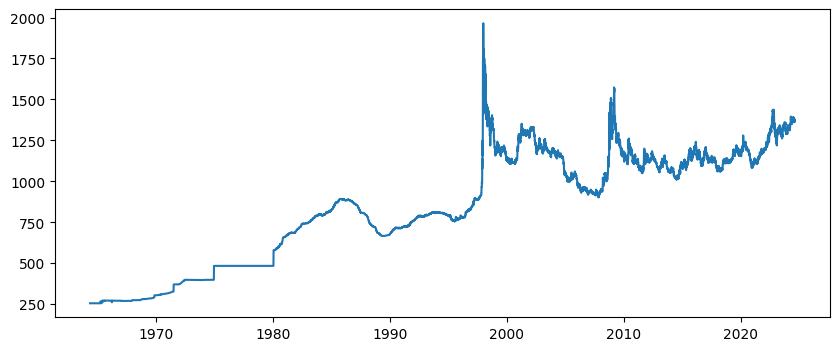

In [6]:
plt.plot(df_xr['krw_usd_xr'])
plt.show()

> Until early 80's, exchange rates are almost flat.\
> Until late 90's, exchange rates show smoothing pattern.

---

# Part I. Downloading and Loading Data from Bank of Korea, Federal Reserve, and World Bank

## 1. Downloading Exchange Rate and Other Macroeconomic Data from Bank of Korea Using Cumtom Functions

> We are to download exchange rates and macroeconomic data from BOK using custom functions. Unfortunately, BOK API is not structured user-friendly so it might be difficult to understand the custom functions at first sight. I uploaded to my github detailed lecture notes as to how BOK API is structured and the descriptions of custom functions. You can refer to them in the following links:
> - **[BOK API 1.](https://github.com/JKang918/ExchangeRatePrediction/blob/main/LectureNotes/3.%20Bank%20of%20Korea%20API.ipynb)**
> - **[BOK API 2.](https://github.com/JKang918/ExchangeRatePrediction/blob/main/LectureNotes/6.%20Downloading%20Data%20from%20Bank%20of%20Korea.ipynb)**

> We are downloading follwing data sets for South Korea and US, respectively:
> 1. Arbitraged Rates of Major Currencies Against Won
> 2. International Consumer Price indices
> 3. Internatioanl Current Account, Total, Net, US Dollars
> 4. International Growth Rate of GDP
> 5. GDP
> 6. Financial Market Key Indicators
> 7. Market Interest Rates(Daily)
> 8. International Reserves - *South Korea only*

In [7]:
import requests

from pandas.tseries.offsets import MonthEnd, YearEnd

##### **Step 1. BOK API - Find the code names for data sets of interest** 

In [8]:
BOK_API_URL = 'https://ecos.bok.or.kr/api'
BOK_API_KEY = 'IDI4QC444EYRWRBBQ8JN' #individual specific API key

> For more information about Bank of Korea API and to generate individual API key for yourself, check out the link below:
>
> - [Bank of Koera API](https://ecos.bok.or.kr/api/)
>
> The website is in ***Korean***. I suggest you to stick with the Korean webpage and use webbrowswer translate function.

In [9]:
#function structured specifically for BOK API system
def fetch_bok_data(service_code, stat_code = None, item = None):
    url = f'{BOK_API_URL}/{service_code}/{BOK_API_KEY}/json/en/1/100000' #10000 is sufficiently large, arbitrary number

    if item is not None:
        url += "/{}/{}/{}/{}/{}".format(

            item['STAT_CODE'], 
            item['CYCLE'],
            item['START_TIME'],
            item['END_TIME'],
            item['ITEM_CODE'],
        )

        #BOK API development guide - item code itself is stratified -> There can be multiple codes 
        if type(item['ITEM_CODE2']) is str:
            url += f"/{item['ITEM_CODE2']}"
        
    elif stat_code:
        url += f'/{stat_code}' 
    
    print(url)
    resp = requests.get(url)
    results = resp.json()
    rows = results[service_code]['row']
    df = pd.DataFrame(rows)

    return df

In [10]:
#StatisticTableList: list names of data sets BOK provides
stat_codes = fetch_bok_data('StatisticTableList')

https://ecos.bok.or.kr/api/StatisticTableList/IDI4QC444EYRWRBBQ8JN/json/en/1/100000


In [11]:
#find data set name including 'consumer'
idx = stat_codes['STAT_NAME'].str.lower().str.find('current account') >= 0
stat_codes.loc[idx]

,P_STAT_CODE,STAT_CODE,STAT_NAME,CYCLE,SRCH_YN,ORG_NAME
409,0000000158,301Y017,2.5.1.2. Current Account(S.A.),M,Y,Bank of Korea
411,0000000158,301Y015,2.5.1.4. Regional Current Account,A,Y,Bank of Korea
949,0000000443,902Y009,"9.1.3.1. Internatioanl Current Account, Total,...",Q,Y,IMF
950,0000000443,902Y010,"9.1.3.2. Internatioanl Current Account, Goods ...",Q,Y,IMF
951,0000000443,902Y011,"9.1.3.3. Internatioanl Current Account, Goods ...",Q,Y,IMF


> This is an example case of searching for a certain data set among the data sets provided by BOK.\
> We assume that we found the exact code names for the right data sets from searching keywords like above. 

In [12]:
#assume we found target data sets searching with index like above.
TARGET_STAT_CODES = [
    '731Y001',  # 3.1.1.1. Arbitraged Rates of Major Currencies Against Won
    '902Y008',  # 9.1.2.2. International Consumer Price indices
    '902Y009',  # 9.1.3.1. Internatioanl Current Account, Total, Net, US Dollars
    '902Y015',  # 9.1.4.1. International Growth Rate of GDP
    '902Y016',  # 9.1.4.2. GDP
    '902Y023',  # 9.1.6.1. Financial Market Key Indicators
    '817Y002',  # 1.3.2.1. Market Interest Rates(Daily)
    '732Y001',  # 3.5. International Reserves
]

##### **Step 2. BOK API - Find the items of interest in each data set**

In [13]:
#Append to an array, the eight tables of interest
dfs = []

for stat_code in TARGET_STAT_CODES:
    df = fetch_bok_data('StatisticItemList', stat_code = stat_code)

    dfs.append(df)

https://ecos.bok.or.kr/api/StatisticItemList/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/731Y001
https://ecos.bok.or.kr/api/StatisticItemList/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/902Y008
https://ecos.bok.or.kr/api/StatisticItemList/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/902Y009
https://ecos.bok.or.kr/api/StatisticItemList/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/902Y015
https://ecos.bok.or.kr/api/StatisticItemList/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/902Y016
https://ecos.bok.or.kr/api/StatisticItemList/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/902Y023
https://ecos.bok.or.kr/api/StatisticItemList/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/817Y002
https://ecos.bok.or.kr/api/StatisticItemList/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/732Y001


In [14]:
#concat the eight tables vertically (axis = 0)
df_item_codes = pd.concat(dfs, axis = 0)

In [15]:
#write it to excel
df_item_codes.to_excel('projectdata/bok_item_codes.xlsx', index = False)

In [16]:
df_item_codes = df_item_codes.set_index(['STAT_CODE', 'ITEM_CODE', 'CYCLE'])

In [17]:
df_item_codes

STAT_NAME  \
STAT_CODE ITEM_CODE CYCLE                                                      
731Y001   0000001   D      3.1.1.1. Arbitraged Rates of Major Currencies ...   
          0000053   D      3.1.1.1. Arbitraged Rates of Major Currencies ...   
          0000002   D      3.1.1.1. Arbitraged Rates of Major Currencies ...   
          0000003   D      3.1.1.1. Arbitraged Rates of Major Currencies ...   
          0000004   D      3.1.1.1. Arbitraged Rates of Major Currencies ...   
...                                                                      ...   
732Y001   04        M                            3.5. International Reserves   
                    Q                            3.5. International Reserves   
          99        A                            3.5. International Reserves   
                    M                            3.5. International Reserves   
                    Q                            3.5. International Reserves   

                          GRP_CODE                 GRP_NAME  \
STAT_CODE ITEM_CODE CYCLE                                     
731Y001   0000001   D       Group1  Selection of Currencies   
          0000053   D       Group1  Selection of Currencies   
          0000002   D       Group1  Selection of Currencies   
          0000003   D       Group1  Selection of Currencies   
          0000004   D       Group1  Selection of Currencies   
...                            ...                      ...   
732Y001   04        M       Group1       Selection of Items   
                    Q       Group1       Selection of Items   
          99        A       Group1       Selection of Items   
                    M       Group1       Selection of Items   
                    Q       Group1       Selection of Items   

                                                                   ITEM_NAME  \
STAT_CODE ITEM_CODE CYCLE                                                      
731Y001   0000001   D      Won per United States Dollar(Basic Exchange Rate)   
          0000053   D                      Won per Yuan(Basic Exchange Rate)   
          0000002   D                           Won per Japanese Yen(100Yen)   
          0000003   D                                           Won per Euro   
          0000004   D                                    Won per German Mark   
...                                                                      ...   
732Y001   04        M                              Foreign Currency Reserves   
                    Q                              Foreign Currency Reserves   
          99        A                                                  Total   
                    M                                                  Total   
                    Q                                                  Total   

                          P_ITEM_CODE P_ITEM_NAME START_TIME  END_TIME  \
STAT_CODE ITEM_CODE CYCLE                                                
731Y001   0000001   D            None        None   19640504  20240813   
          0000053   D            None        None   20160104  20240813   
          0000002   D            None        None   19770401  20240813   
          0000003   D            None        None   19940411  20240813   
          0000004   D            None        None   19640504  20011231   
...                               ...         ...        ...       ...   
732Y001   04        M              99       Total     197101    202407   
                    Q              99       Total     1971Q1    2024Q2   
          99        A            None        None       1960      2023   
                    M            None        None     197101    202407   
                    Q            None        None     1971Q1    2024Q2   

                           DATA_CNT UNIT_NAME WEIGHT  
STAT_CODE ITEM_CODE CYCLE                             
731Y001   0000001   D         17000       Won   None  
          0000053   D          2127  

##### **Step 3. Download data values from the items**

- *data_down_list* : list of data specification to extract data accordingly.
- This excel file is made manually after carefully studying *df_item_codes* above.

In [18]:
data_download_list = pd.read_excel('projectdata/bok_data_download_list.xlsx')

In [19]:
data_download_list

,name,STAT_CODE,STAT_NAME,ITEM_CODE,ITEM_CODE2,ITEM_NAME,CYCLE,UNIT_NAME
0,krw_usd_xr,731Y001,3.1.1.1. Arbitraged Rates of Major Currencies ...,0000001,NaN,Won per United States Dollar(Basic Exchange Rate),D,Won
1,cpi_korea,902Y008,9.1.2.2. International Consumer Price indices,KR,NaN,"Korea, Republic Of",M,2010=100
2,cpi_us,902Y008,9.1.2.2. International Consumer Price indices,US,NaN,United States,M,2010=100
3,current_account_korea,902Y009,"9.1.3.1. Internatioanl Current Account, Total,...",KR,NaN,"Korea, Republic Of",Q,Mil.U$
4,current_account_us,902Y009,"9.1.3.1. Internatioanl Current Account, Total,...",US,NaN,United States,Q,Mil.U$
5,gdp_growth_korea,902Y015,9.1.4.1. International Growth Rate of GDP,KOR,NaN,"Korea, Republic Of",Q,%
6,gdp_growth_us,902Y015,9.1.4.1. International Growth Rate of GDP,USA,NaN,United States,Q,%
7,gdp_korea,902Y016,9.1.4.2. GDP,KOR,NaN,"Korea, Republic Of",A,Mil.U$
8,gdp_us,902Y016,9.1.4.2. GDP,USA,NaN,United States,A,Mil.U$
9,foreign_reserves,732Y001,3.5. International Reserves,99,NaN,Total,M,Thou.U$


In [20]:
#iterate over rows
for idx, row in data_download_list.iterrows():
    name = row['name']

    print(f"Downloading {name} ...")
    idx = (row.STAT_CODE, row.ITEM_CODE, row.CYCLE)
    item = df_item_codes.loc[idx]

    #merge downloaded data and preparaed excel file (itemlists of interest)
    item = {**item, **row}

    #from items of interest, fetch data
    df = fetch_bok_data('StatisticSearch', item = item)
    df = df[['TIME', 'DATA_VALUE']]

    #for timestamp

    #daily data - 8 digit date
    if row['CYCLE'] == 'D':
        df['date'] = pd.to_datetime(df['TIME'])

    #monthly data - 6 digit date
    elif row['CYCLE'] == 'M':
        df['date'] = pd.to_datetime(df['TIME'], format = '%Y%m') + MonthEnd()

    #quarterly data - yyyyQx
    elif row['CYCLE'] == 'Q':
        df['year'] = df['TIME'].str[:4]
        df['month'] = df['TIME'].str[-1].astype(int) * 3
        df['day'] = 1
        df['date'] = pd.to_datetime(df[['year', 'month', 'day']]) + MonthEnd()

    #annual data - 4 digit date
    elif row['CYCLE'] == 'A':
        df['date'] = pd.to_datetime(df['TIME']) + YearEnd()
    
    else:
        raise RuntimeError()
    
    
    df = df[['date', 'DATA_VALUE']]
    df = df.rename(columns = {
        'DATA_VALUE' : name,
    })
    df[name] = df[name].astype(float)
    
    #change the filepath, if you'd like to
    df.to_excel(f"projectdata/{name}.xlsx", index = False)
    
    print()

print('** Completed !! **')

https://ecos.bok.or.kr/api/StatisticSearch/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/731Y001/D/19640504/20240813/0000001

https://ecos.bok.or.kr/api/StatisticSearch/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/902Y008/M/195108/202406/KR

https://ecos.bok.or.kr/api/StatisticSearch/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/902Y008/M/195501/202406/US

https://ecos.bok.or.kr/api/StatisticSearch/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/902Y009/Q/1976Q1/2024Q1/KR

https://ecos.bok.or.kr/api/StatisticSearch/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/902Y009/Q/1973Q1/2024Q1/US

https://ecos.bok.or.kr/api/StatisticSearch/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/902Y015/Q/1960Q2/2024Q2/KOR

https://ecos.bok.or.kr/api/StatisticSearch/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/902Y015/Q/1947Q2/2024Q2/USA

https://ecos.bok.or.kr/api/StatisticSearch/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/902Y016/A/1953/2023/KOR

https://ecos.bok.or.kr/api/StatisticSearch/IDI4QC444EYRWRBBQ8JN/json/en/1/100000/902Y016/A/1970/2023/USA

https://ecos.b

> Data files are successfully saved in "projectdata" folder. You can change the filepath within the custom function above, if you would like to.

## 2. Downloading Tresuary Term Spread Data from Federal Reserve

Downloading data from Federal Reserve is a lot easier than BOK case. Get your API key from [here - stlouisfed.org](https://fred.stlouisfed.org/docs/api/fred/) and use ***fredapi*** module and you are good to go. 

If you would like to see more test cases of using ***fredapi***, check out [here - mortada/github](https://github.com/mortada/fredapi).

In [21]:
#pip install fredapi

In [22]:
from fredapi import Fred
fred = Fred(api_key='2b947fe722489ce25868587bfcee807d') #your own API key

In [23]:
#term spread bewteen 10-year treasury yield and 3-month treasury yield 
#daily data
T10Y3M = fred.get_series('T10Y3M', observation_start='1998-12-31')
T10Y3M.tail()

2024-08-06   -1.44
2024-08-07   -1.38
2024-08-08   -1.35
2024-08-09   -1.39
2024-08-12   -1.43
dtype: float64

In [24]:
T10Y3M = T10Y3M.to_frame()

In [25]:
T10Y3M = T10Y3M.rename(columns={T10Y3M.columns[0]: '10y-3m spread'})

In [26]:
T10Y3M.columns

Index(['10y-3m spread'], dtype='object')

In [27]:
T10Y3M.head()

,10y-3m spread
1998-12-31,0.17
1999-01-01,NaN
1999-01-04,0.20
1999-01-05,0.26
1999-01-06,0.26


In [28]:
plt.rcParams['figure.figsize'] = (10, 4)

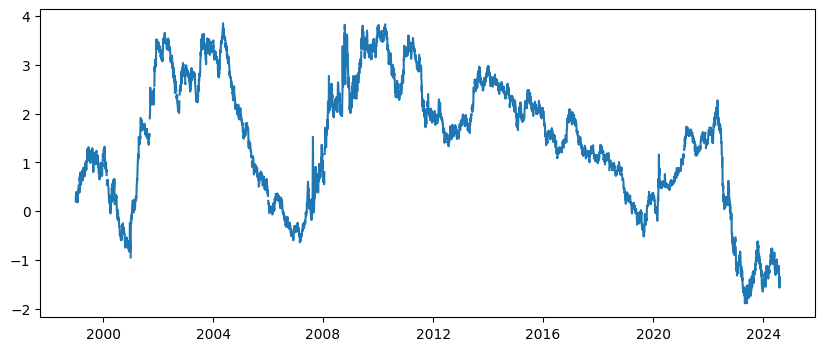

In [29]:
#to get the breif overview of the downloaded data
plt.plot(T10Y3M)
plt.show()

> The data exhibits non-stationarity.\
> In later sections, we will tackle this issue by first, formally identifying non-stationarity and then modifying the data to obtain new stationary data. 

## 3. Downloading PPP Exchange Rate Data from World Bank

Technically, we can download required data from World Bank with customized function carefully following the development specification of World Bank API. However, in this project, for the sake of simplicity, we skip that part. The procedure is identical to the case of Bank of Korea and Federal Reserve: first, you read the development specification and build customized function to download the data accordingly.

Click the following link and download PPP exchange rate data from World Bank database:

* **[World Bank PPP Exchange Rate Data](https://data.worldbank.org/indicator/PA.NUS.PPP?locations=KR)**
    * Go to the link above, download the excel file to 'projectdata' folder, and reaname the file as ***world_ppp_xr.xls***

Remember, real exchange rate is the ratio of internal purchasing power to external purchasing power. In other words, this is also, the ratio of PPP exchange rate to actual market exchange rate in the case of indirect quotation. 

## 4. Loading the Downloaded Data

### 4.1. Bank of Korea

In [30]:
#These are the names of data files downloaded from BOK
filenames = [
    'krw_usd_xr',
    'current_account_korea',
    'current_account_us',
    'gdp_korea',
    'gdp_us',
    'gdp_growth_korea',
    'gdp_growth_us',
    'cpi_korea',
    'cpi_us',
    'int_rate_korea',
    'int_rate_us',
    'foreign_reserves',
]

In [31]:
dfs = []

for fname in filenames:
    print(f'Loading {fname}...')

    #filepath is where downloaded data are saved
    df = pd.read_excel(f'projectdata/{fname}.xlsx')
    df = df.set_index('date')

    #quarterly datasets
    if fname in [
        'gdp_growth_korea',
        'gdp_growth_us',
        'current_account_korea',
        'current_account_us',
    ]:
        #rolling sum to make them annual returns
        df[fname] = df[fname].rolling(4).sum()
        

    dfs.append(df)

print('** Completed! **')

Loading krw_usd_xr...
Loading current_account_korea...
Loading current_account_us...
Loading gdp_korea...
Loading gdp_us...
Loading gdp_growth_korea...
Loading gdp_growth_us...
Loading cpi_korea...
Loading cpi_us...
Loading int_rate_korea...
Loading int_rate_us...
Loading foreign_reserves...
** Completed! **


> The reason we can use rolling sum as a good approximation of rolling product is explained in **[this lecture note](https://github.com/JKang918/ExchangeRatePrediction/blob/main/LectureNotes/7.%20Understanding%20Rolling%20Sum.ipynb)**.

### 4.2. Fedral Reserve

In the case of treasury term spread data, as we already have it in pandas dataframe, simply add it to the array of dataframes.

In [32]:
dfs.append(T10Y3M)

### 4.3. World Bank

In [33]:
def load_worldbank_data_korea(filepath, column):

    #our data values are located in 'Data' sheet
    df = pd.read_excel(filepath, sheet_name = 'Data', skiprows = 3)

    #to find korea data
    df = df.set_index('Country Code')
    df = df.loc['KOR'].to_frame()
    
    #first three rows are not data values but labels
    df = df.iloc[3:]
    df = df.dropna()
    
    #not necessary for recent pandas versions but still included in case someone uses older versions
    df = df.astype('float')

    #make it year end #timestamp
    df['date'] = pd.to_datetime(df.index) + YearEnd(0)

    #date-indexing
    df = df.set_index('date')

    #rename column
    df.columns = [column]
    
    return df

In [34]:
df_ppp_xr_kor = \
    load_worldbank_data_korea('data/world_ppp_xr.xls', 'krw_usd_ppp_xr')

In [35]:
dfs.append(df_ppp_xr_kor)

In [36]:
#if the length of dfs is 14, you have successfully loaded 20 dataframes we are going to use
len(dfs)

14

---

# Part II. Data Preprocessing

We have to preprocess and cleanse the data for proper modeling. 

* modify non-stationary data into stationary data (e.g., using return, normalization)
* calculate required new columns with existing columns (e.g., Real exchange rate)

## 1. Merge, Resample, and Forward Fill the Datasets

In [37]:
#concatenate 14 dataframes horizontally #they are all timestamped and date-indexed arleady
df_merged = pd.concat(dfs, axis = 1)

In [38]:
# resample to monthly data: resample('ME')
# end-of-month observation: last()
df_merged = df_merged.resample('ME').last()

> Resample to monthly data
> - daily data: too many data points may increase the risk of poor model looking to have high explanatory power
> - yearly data: too few data points due to loss of sample, which may increase the risk of good model looking to have low explanatory power
> 
> So, we stick to montly data

> End-of-month observation
> - using monthly average creates a problem of using future data for future prediction
> 
> So, we stick to end-of-month observations over monthly average

In [39]:
df_merged = df_merged.ffill()

> Forward Fill
> - backward fill leads to a problem of using future data for future prediction
> - interpolation leads to a problem of using future data for future prediction

In [40]:
# check the preprocessed data set
df_merged.loc['2020-01-01':].head()

,krw_usd_xr,current_account_korea,current_account_us,gdp_korea,gdp_us,gdp_growth_korea,gdp_growth_us,cpi_korea,cpi_us,int_rate_korea,int_rate_us,foreign_reserves,10y-3m spread,krw_usd_ppp_xr
2020-01-31,1183.5,59676.1,-441748.0,1651422.9,21521395.0,2.607,3.146,115.88,118.31,1.47,1.65,409652586.0,-0.04,847.547829
2020-02-29,1215.9,59676.1,-441748.0,1651422.9,21521395.0,2.607,3.146,115.96,118.63,1.42,1.59,409171436.0,-0.14,847.547829
2020-03-31,1222.6,61844.7,-432948.0,1651422.9,21521395.0,1.263,1.240,115.71,118.37,1.23,1.35,400214398.0,0.59,847.547829
2020-04-30,1225.2,61844.7,-432948.0,1651422.9,21521395.0,1.263,1.240,115.20,117.58,1.10,1.35,403982333.0,0.55,847.547829
2020-05-31,1239.4,61844.7,-432948.0,1651422.9,21521395.0,1.263,1.240,115.13,117.58,1.02,0.17,407310604.0,0.51,847.547829


## 2. Calculate New Required Columns with Existing Columns: For Stationarity

#### **Percentage change of exchange rate**

$$
S_{F.ann_ret} = (\frac{S_{t+12}}{S_t} - 1) * 100
$$

In [41]:
df_merged['ann_ret'] = \
    df_merged['krw_usd_xr'].pct_change(periods = 12) * 100

In [42]:
#target Y
#overlapping
df_merged['F12.ann_ret'] = df_merged['ann_ret'].shift(-12)

> Exchange rate itself is non-stationary.\
> Use return of exchange rate instead, which is stationary.\
> `pct_change(periods = 12)` means returns are computed between corresponding months with a year apart. We choose to do this over calculating monthly return between adjacent months to exclude seasonality.

#### **Real exchange rates**

$$
\text{Real XR} = \frac{S^{PPP}}{S}
$$

> indirect quotation

In [43]:
df_merged['krw_usd_real_xr'] = \
    df_merged['krw_usd_ppp_xr'] / df_merged['krw_usd_xr']

#### **Current accounts relative to GDP**

$$
\text{current account relative to GDP} = \frac{\text{current account}}{\text{GDP}}
$$

In [44]:
df_merged['ca_gdp_korea'] = \
    df_merged['current_account_korea'] / df_merged['gdp_korea'] * 100

In [45]:
df_merged['ca_gdp_us'] = \
    df_merged['current_account_us'] / df_merged['gdp_us'] * 100

> Instead of using current account itself, normalize it with GDP to restore stationarity.\
> Let us breifly look at the patterns of each current account to better understand this.

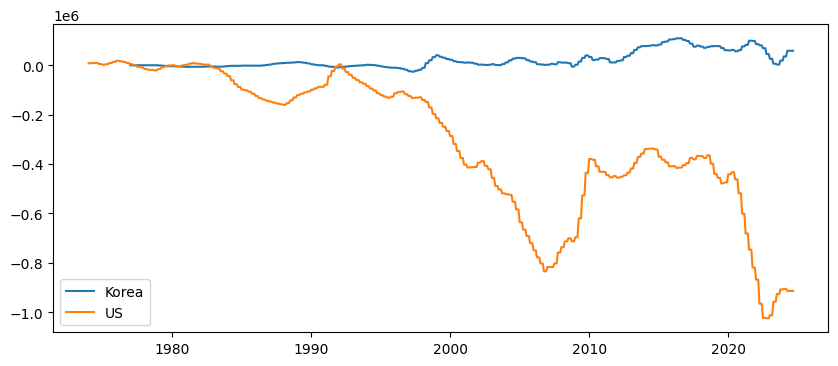

In [46]:
# non-stationary processes
plt.plot(df_merged['current_account_korea'], label = 'Korea')
plt.plot(df_merged['current_account_us'], label = 'US')
plt.legend()
plt.show()

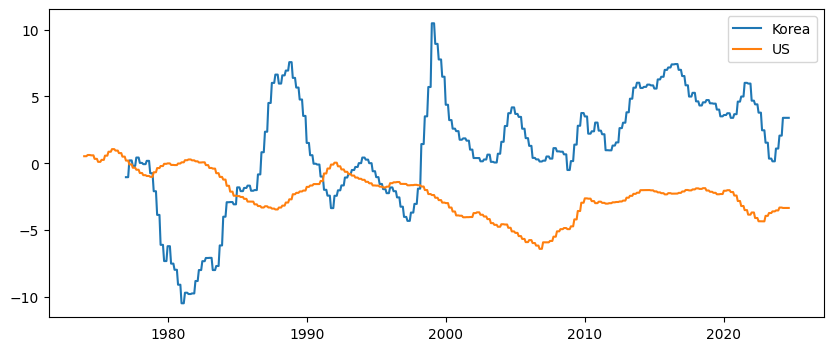

In [47]:
#stationary processes
plt.plot(df_merged['ca_gdp_korea'], label = 'Korea')
plt.plot(df_merged['ca_gdp_us'], label = 'US')
plt.legend()
plt.show()

> There are statistical test methods, the most famous of which would be Augmented Dickey-Fuller test (ADF test), for testing stationarity. However, it is not recommended to apply these tests mechanically without considering the fundamental nature of the given data. Moreover, in the analysis of economic and financial data, it is known that following well-established academic conventions is the standard. In the case of current account data, it is clearly incorrect to use the current account data directly; the commonly accepted standard approach is to normalize it by dividing it by the GDP.

In [48]:
from statsmodels.tsa.stattools import adfuller

In [49]:
#South Korean Current Account is non-stationary 
ADF_result = adfuller(df_merged['current_account_korea'].dropna())
 
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.4359803919923324
p-value: 0.5649103527282072


In [50]:
#US Current Account is non-stationary 
ADF_result = adfuller(df_merged['current_account_us'].dropna())
 
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.1476351605677981
p-value: 0.6957067972982445


#### **GDP Growth**

We downloaded both GDP and GDP growth data from Bank of Korea database. In this section, we see why we downloaded GDP growth data separately in the first place when we could easily compute GDP growth from existing GDP data.

In [51]:
#gdp_growth_korea2: computed from gdp data
df_merged['gdp_growth_korea2'] = \
    df_merged['gdp_korea'].pct_change(periods = 12) * 100

In [52]:
df_merged['gdp_growth_us2'] = \
    df_merged['gdp_us'].pct_change(periods = 12) * 100

In [53]:
df_merged.loc[['2018-12-31', '2019-12-31']]\
    [['gdp_us', 'gdp_growth_us', 'gdp_growth_us2']]

,gdp_us,gdp_growth_us,gdp_growth_us2
2018-12-31,20656516.0,2.110,5.325355
2019-12-31,21521395.0,3.146,4.186955


In [54]:
(21521395.0	/ 20656516.0 - 1) * 100

4.186954857246983

> Somehow GDP growth rates we downloaded from BOK are different from GDP growth rates computed from GDP data which is also downloaded from BOK.\
> 
> This is because GDP data is nominal while GDP growth data ('gdp_grwoth_us') is based on real GDP. We are using real GDP growth rate data.\
> In other words, we are using *gdp_growth_us* but not *gdp_growth_us2*.
>
> Note. The growth rate here is rolled sum.

#### **Inflation (YoY)**

$$
\pi = (\frac{cpi_{t}}{cpi_{t-12}} - 1) * 100
$$

In [55]:
df_merged['infl_korea'] = \
    df_merged['cpi_korea'].pct_change(periods = 12) * 100

In [56]:
df_merged['infl_us'] = \
    df_merged['cpi_us'].pct_change(periods = 12) * 100

#### **Relative inflation & Interest rate difference**

$$
\begin{align}
\pi_{\text{diff}} &= \pi_{\text{kor}} - \pi_{\text{us}} \\
i_{\text{diff}} &= i_{\text{kor}} - i_{\text{us}}
\end{align}
$$

In [57]:
df_merged['infl_diff_kr_us'] = \
    df_merged['infl_korea'] - df_merged['infl_us']

In [58]:
df_merged['int_rate_diff_kr_us'] = \
    df_merged['int_rate_korea'] - df_merged['int_rate_us']

#### **Growth rate international reserve in relation to GDP**

In [59]:
plt.rcParams['figure.figsize'] = (10, 4)

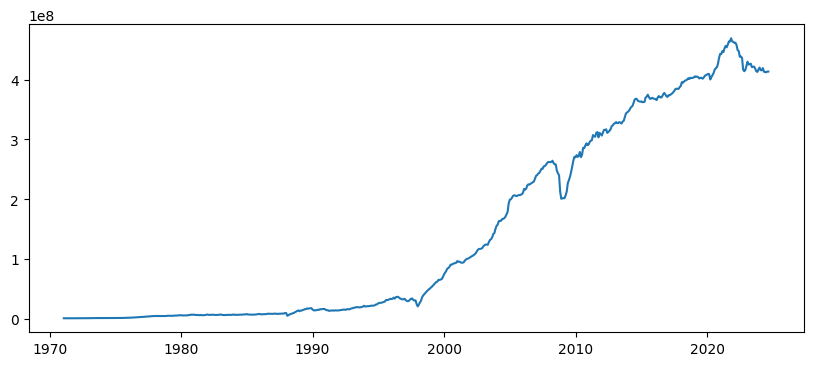

In [60]:
#non-stationary process
plt.plot(df_merged['foreign_reserves'])

> Foreign reserve follows non-stationary process.\
> We normalize the data in the following two ways:

##### **Method 1.**

$$
\text{foreign reserve relative to GDP} = \frac{\text{foreign reserve}}{\text{GDP}}
$$

In [61]:
#normalize method 1. - level
#foreign reserves: thousand dollar , gdp: million dollar
df_merged['reserves_to_gdp'] = df_merged['foreign_reserves'] / df_merged['gdp_korea'] / 1000 * 100

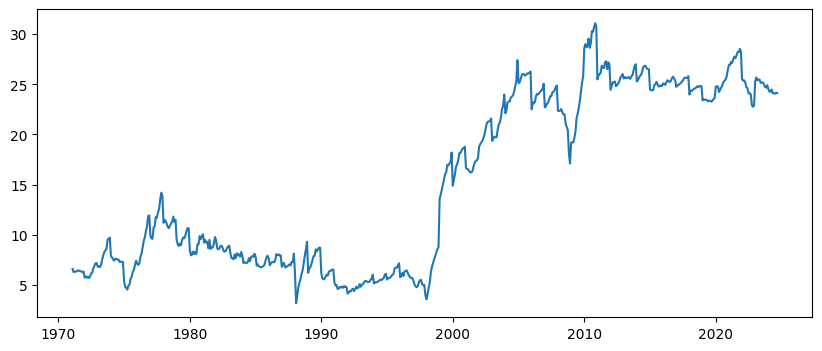

In [62]:
plt.plot(df_merged['reserves_to_gdp'])
plt.show()

##### **Method 2.**

$$
\text{foreign reserve growth rate} = \frac{\text{foreign reserve}_t}{\text{foreign reserve}_{t-12}}
$$

In [63]:
#normalize method 2. - growth
df_merged['reserves_growth'] = \
    df_merged['foreign_reserves'].pct_change(periods = 12) * 100

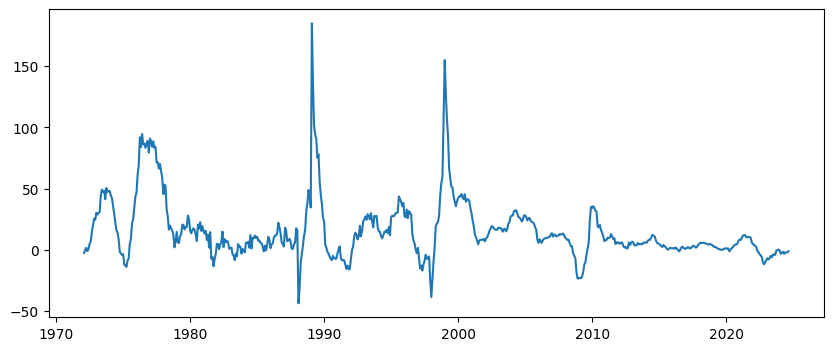

In [64]:
plt.plot(df_merged['reserves_growth'])
plt.show()

#### **10y-3m spread**

In [65]:
plt.rcParams['figure.figsize'] = (10, 4)

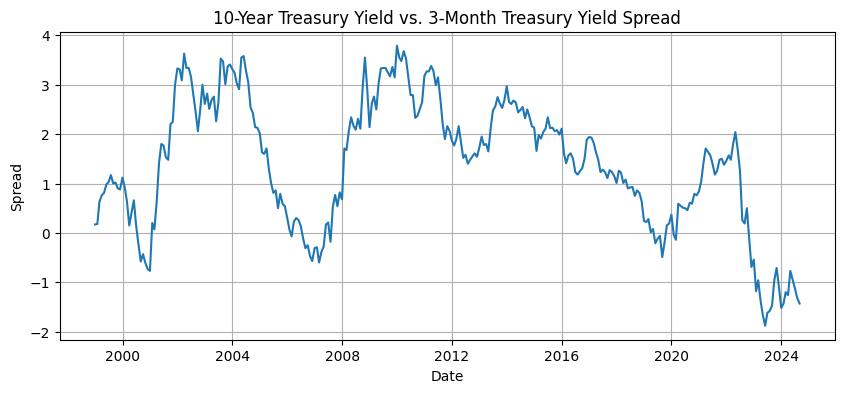

In [66]:
plt.plot(df_merged['10y-3m spread'])
plt.title('10-Year Treasury Yield vs. 3-Month Treasury Yield Spread')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.grid(True)
plt.show()

In [67]:
ADF_result = adfuller(df_merged['10y-3m spread'].dropna())
 
print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.6650002115221743
p-value: 0.44922960015739427


> 10Y - 3M spread is non-stationary process as indicated by the graph and ADF test.\
> To convert it to stationary process, apply first-order differencing

\begin{align}
\text{Term Spread} &= i_{10Y} - i_{3M} \\
\text{differenced: } \Delta \text{Term Spread}_t &= \left(i_{10Y,t} - i_{3M,t}\right) - \left(i_{10Y,t-1} - i_{3M,t-1}\right)
\end{align}

In [68]:
df_merged['10y-3m spread_diff'] = df_merged['10y-3m spread'].diff()

In [69]:
ADF_result = adfuller(df_merged['10y-3m spread_diff'].dropna())

print('ADF Statistic (Differenced):', ADF_result[0])
print('p-value (Differenced):', ADF_result[1])

ADF Statistic (Differenced): -9.301196848935648
p-value (Differenced): 1.111303540175847e-15


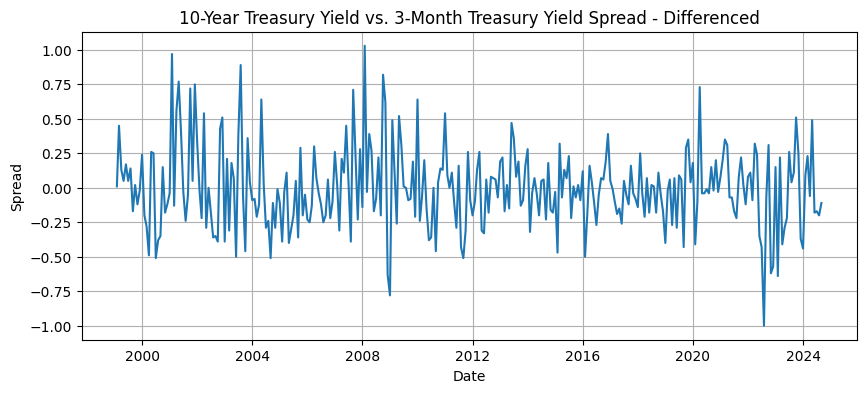

In [70]:
plt.plot(df_merged['10y-3m spread_diff'])
plt.title('10-Year Treasury Yield vs. 3-Month Treasury Yield Spread - Differenced')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.grid(True)
plt.show()

> ADF test result and the graph suggest that the differenced spread data is stationary.

> **Summary of this section:**
>
> We use return of exchange rates instead of raw exchange rates.\
> We calculated real exchange rates using PPP rates and market exchange rates.\
> We normalized current accounts with the respective size of GDP.\
> We normalized GDP by using return of real GDP.\
> We normalized price leve (cpi) by using inflation.\
> We calculated interest rate difference between the two countries.\
> We normalized foreign reserve in two ways: 1. using the relative size of it considering GDP, 2. using growth rate of it.\
> We differenced 10Y - 3M Treasury yield spread.

---

# Part III. Modeling and Analysis of Model Result

## 1. Take Necessary Columns for Modeling

In [71]:
#Target: F12.ann_ret
#Explanatory: Others
df_sample = df_merged[[
    'F12.ann_ret', 'krw_usd_real_xr',
    'ca_gdp_korea', 'ca_gdp_us',
    'gdp_growth_korea', 'gdp_growth_us',
    'infl_diff_kr_us', 'int_rate_diff_kr_us',
    'reserves_to_gdp', 'reserves_growth',
    '10y-3m spread_diff'
]]

In [72]:
df_sample.tail(15)

,F12.ann_ret,krw_usd_real_xr,ca_gdp_korea,ca_gdp_us,gdp_growth_korea,gdp_growth_us,infl_diff_kr_us,int_rate_diff_kr_us,reserves_to_gdp,reserves_growth,10y-3m spread_diff
2023-06-30,5.819622,0.617330,0.149446,-3.597557,0.929,2.361,-0.235749,-1.47,25.177715,-3.838753,0.26
2023-07-31,8.171875,0.633149,0.149446,-3.597557,0.929,2.361,-0.820120,-1.60,25.198617,-3.830678,0.04
2023-08-31,3.503860,0.613312,0.149446,-3.597557,0.929,2.361,-0.311286,-1.74,24.989364,-4.154381,0.11
2023-09-30,NaN,0.602640,1.104655,-3.524772,1.292,2.896,0.003437,-1.73,24.739455,-0.635568,0.51
2023-10-31,NaN,0.599077,1.104655,-3.524772,1.292,2.896,0.525034,-1.64,24.665127,-0.273444,0.25
2023-11-30,NaN,0.628728,1.104655,-3.524772,1.292,2.896,0.175262,-1.58,24.916410,0.234314,-0.37
2023-12-31,NaN,0.620714,2.071949,-3.310582,2.199,3.099,-0.172366,-1.49,24.529989,-0.712669,-0.44
2024-01-31,NaN,0.601494,2.071949,-3.310582,2.199,3.099,-0.273367,-1.52,24.273732,-3.304646,0.09
2024-02-29,NaN,0.599961,2.071949,-3.310582,2.199,3.099,-0.036804,-1.53,24.272549,-2.244997,0.23
2024-03-31,NaN,0.594259,3.402846,-3.339714,3.059,2.894,-0.379624,-1.64,24.477643,-1.600210,-0.06


## 2. Correlation Matrix for Explanatory Variables

In [73]:
import seaborn as sns
import numpy as np

In [74]:
#correlation matrix
corr = df_sample.corr()

In [75]:
#upper triangle matrix with elements of '1's
mask = np.triu(np.ones_like((corr)))

In [76]:
#color map to designate warmer colors to higher values
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<Axes: >

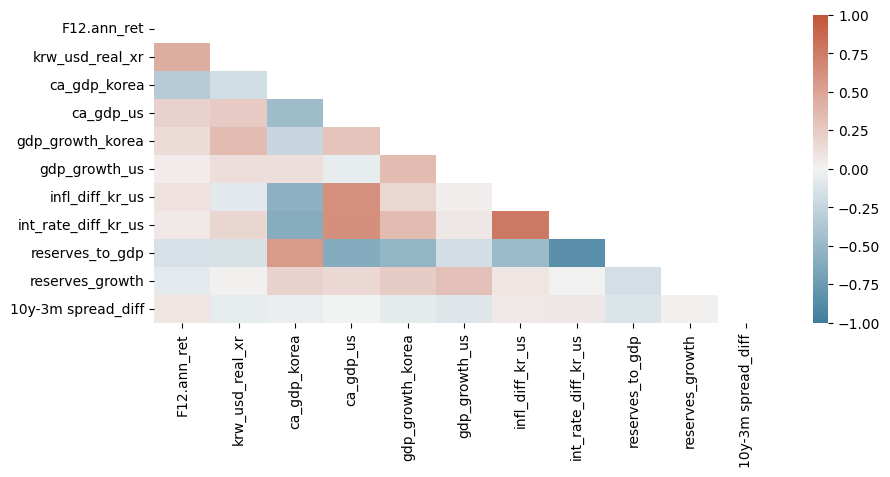

In [77]:
#vmax and vmin are set to -1 and 1 to reflect the characteristic of correlation
sns.heatmap(corr, cmap = cmap, mask = mask, vmin = -1, vmax = 1)

> Possible severe multicollinearity between **relative inflation** *(infl_diff_kr_us)* and **interest rate difference** *(int_rate_diff_kr_us)* is observed.
>
> This result is actually no surprising given that Fisher Relation suggests the two converge.

## 3. OLS Regression with Overlapped Data

In [78]:
import statsmodels.api as sm

In [79]:
#drop Null
df_sample = df_sample.dropna()

In [80]:
#after the IMF crisis
df_sample = df_sample.loc['1998-12-31':]

> Again, as explained in "**Introduction**", we are cropping off data from period before 1999. During those times, South Korea had completely different exchange rate regimes in place, exchange rates from the era shows fundamentally different patterns than those of exchange rates these days.  

#### **Variable Selection (AIC, BIC, Adjusted R-squared)**

Among the variables we chose based on theories, we are going to select the right set of variables that maximizes the explanatory power of the model. The problem is the commonly used indicator for explanatory power, R-squared, monotonistically increases when more variables are added even when those variables have no actual value in terms of additional information and conversely, increase the risk of overfitting. Statisticians use alternative metrics to consider both the positive and negative impacts of adding a new variable to the model.   

* AIC : Akaike information criterion
* BIC : Bayesian information criterion (also knwoan as SIC, Schwarz information criterion)
* Adjusted R-squared

$$
\begin{align}
\text{AIC} &= 2k - 2 \ln \left( \hat{L} \right) \\
\text{BIC} &= k \ln (n) - 2 \ln \left( \hat{L} \right) \\
\text{Adjusted } R^2 &= 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right)
\end{align}
$$

where
* $k$ : number of parameters
* $n$ : number of observations
* $\hat{L}$ : likelihood


> From the formula for each score, you can easily see that AIC and BIC are penalty score (meaing, the lower the better), and Adj R-squared is a reward score (meaning, the higher the better). In this section, we are using AIC because it is most commonly used for selecting variables. Using BIC or Adj R-squared would lead to similar results.

In [81]:
Y = df_sample['F12.ann_ret']

In [82]:
#first column is the target variable
X = df_sample.iloc[:, 1:]
X = sm.add_constant(X)

In [133]:
#train the model with all candidate variables
model = sm.OLS(Y, X)
results = model.fit()
#results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     12.73
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           2.47e-18
Time:                        18:22:18   Log-Likelihood:                -1069.2
No. Observations:                 296   AIC:                             2160.
Df Residuals:                     285   BIC:                             2201.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -27.2813      6.436     -4.239      0.000     -39.949     -14.614
krw_usd_real_xr        67.6105      9.061      7.462      0.000      49.775      85.446
ca_gdp_korea           -1.1144      0.385     -2.897      0.004      -1.872      -0.357
ca_gdp_us               0.8389      0.648      1.295      0.196      -0.436       2.114
gdp_growth_korea        0.6122      0.263      2.324      0.021       0.094       1.131
gdp_growth_us          -0.1583      0.364     -0.434      0.664      -0.876       0.559
infl_diff_kr_us        -2.5301      0.536     -4.719      0.000      -3.586      -1.475
int_rate_diff_kr_us     0.4644      0.520      0.894      0.372      -0.558       1.487
reserves_to_gdp        -0.6853      0.228     -3.002      0.003      -1.135      -0.236
reserves_growth        -0.0493      0.042     -1.180      0.239      -0.131       0.033
10y-3m spread_diff      3.2808      1.842      1.781      0.076      -0.344       6.906
==============================================================================
Omnibus:                      113.667   Durbin-Watson:                   0.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.055
Skew:                           1.561   Prob(JB):                    2.13e-110
Kurtosis:                       8.586   Cond. No.                         519.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
#current AIC
#can we get it lower?
min_aic = results.aic
min_aic

2160.3389178682555

In [85]:
selected = X.columns.tolist()

In [86]:
selected

['const',
 'krw_usd_real_xr',
 'ca_gdp_korea',
 'ca_gdp_us',
 'gdp_growth_korea',
 'gdp_growth_us',
 'infl_diff_kr_us',
 'int_rate_diff_kr_us',
 'reserves_to_gdp',
 'reserves_growth',
 '10y-3m spread_diff']

In [87]:
#input(res): the fitted result of model
def find_largest_pvalue_index(res):

    #p-values of variables (except p-value of constant)
    max_pvalue = max(res.pvalues[1:])

    #get the index of the variable with the largest p-value
    max_pvalue_idx = res.pvalues.tolist().index(max_pvalue)

    #output: the index of the explanatory variable with the largest p-value
    return max_pvalue_idx

In [88]:
#for loop to find the set of variables resulting in the lowest AIC
for i in range(len(selected)):
    print(f'** Loop {i} **')

    #find the index of the variable with the greatest p-value
    idx = find_largest_pvalue_index(results)
    print('Drop: ', selected[idx])

    #drop that variable
    selected.pop(idx)
    print('Remaining: ', selected)

    #check out the new AIC to see whether it is improved (= lowered)
    model = sm.OLS(Y, X[selected])
    results = model.fit()
    print('AIC: {:.2f}'.format(results.aic))

    #if excluding the varible led to poor AIC -> stop
    if results.aic > min_aic:
        break

    #continue if AIC is improved
    else:
        min_aic = results.aic

#this will result in the selected variables in the penultimate loop having the best (= lowest) AIC

** Loop 0 **
Drop:  gdp_growth_us
Remaining:  ['const', 'krw_usd_real_xr', 'ca_gdp_korea', 'ca_gdp_us', 'gdp_growth_korea', 'infl_diff_kr_us', 'int_rate_diff_kr_us', 'reserves_to_gdp', 'reserves_growth', '10y-3m spread_diff']
AIC: 2158.53
** Loop 1 **
Drop:  int_rate_diff_kr_us
Remaining:  ['const', 'krw_usd_real_xr', 'ca_gdp_korea', 'ca_gdp_us', 'gdp_growth_korea', 'infl_diff_kr_us', 'reserves_to_gdp', 'reserves_growth', '10y-3m spread_diff']
AIC: 2157.33
** Loop 2 **
Drop:  reserves_growth
Remaining:  ['const', 'krw_usd_real_xr', 'ca_gdp_korea', 'ca_gdp_us', 'gdp_growth_korea', 'infl_diff_kr_us', 'reserves_to_gdp', '10y-3m spread_diff']
AIC: 2156.51
** Loop 3 **
Drop:  10y-3m spread_diff
Remaining:  ['const', 'krw_usd_real_xr', 'ca_gdp_korea', 'ca_gdp_us', 'gdp_growth_korea', 'infl_diff_kr_us', 'reserves_to_gdp']
AIC: 2158.05


> The lowest AIC is *2156.51*.\
> Select the variables with the lowest AIC.

> Take note of the fact that we are using **relative inflation** *(infl_diff_kr_us)* but not **interest rate difference** *(int_rate_diff_kr_us)*.\
> These are variables we found to have high multicolinearity from the correlation matrix earlier. It makes sense to include only one of them to our model.

#### **Model Results**

In [89]:
#variables with the lowest AIC
columns = ['krw_usd_real_xr', 'ca_gdp_korea', 'ca_gdp_us', 'gdp_growth_korea', 'infl_diff_kr_us', 'reserves_to_gdp', '10y-3m spread_diff']

In [90]:
X2 = df_sample[columns]

In [91]:
X2 = sm.add_constant(X2)

In [92]:
model = sm.OLS(Y, X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     17.95
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           9.33e-20
Time:                        15:18:03   Log-Likelihood:                -1070.3
No. Observations:                 296   AIC:                             2157.
Df Residuals:                     288   BIC:                             2186.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -26.4564      6.213     -4.258      0.000     -38.685     -14.228
krw_usd_real_xr       66.3083      8.983      7.381      0.000      48.627      83.989
ca_gdp_korea          -1.3379      0.341     -3.928      0.000      -2.008      -0.667
ca_gdp_us              1.1668      0.601      1.941      0.053      -0.016       2.350
gdp_growth_korea       0.5115      0.210      2.440      0.015       0.099       0.924
infl_diff_kr_us       -2.2369      0.418     -5.349      0.000      -3.060      -1.414
reserves_to_gdp       -0.5961      0.213     -2.793      0.006      -1.016      -0.176
10y-3m spread_diff     3.4080      1.830      1.862      0.064      -0.194       7.010
==============================================================================
Omnibus:                      119.522   Durbin-Watson:                   0.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.476
Skew:                           1.626   Prob(JB):                    2.19e-124
Kurtosis:                       8.966   Cond. No.                         449.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### **Visual Analytics**

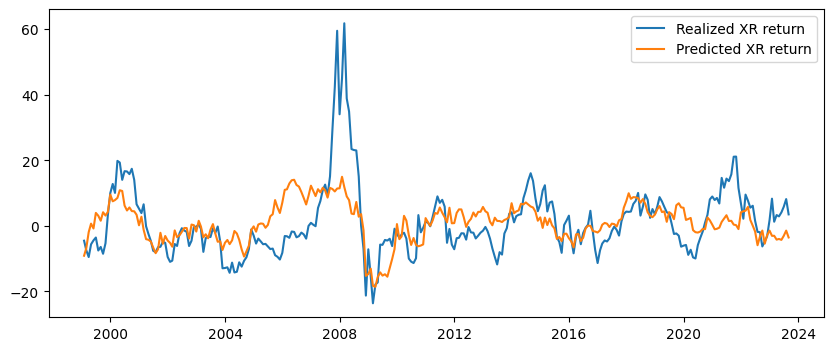

In [93]:
plt.plot(Y, label = 'Realized XR return')
plt.plot(Y.index, results.predict(), label = 'Predicted XR return')
plt.legend()
plt.show()

> Superimposed predicted exchange rate return onto actual return.
> 
> As can be seen in the graph around 2008, tail risks are impossible to predict with our model. But this is ok. They would not have been called "tail risk" if they could be predicted at all.   

In [94]:
plt.rcParams['figure.figsize'] = (4, 4)

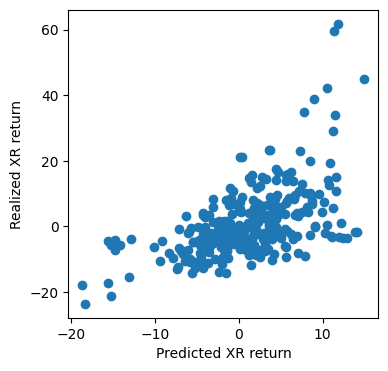

In [95]:
plt.scatter(results.predict(), Y)
plt.xlabel('Predicted XR return')
plt.ylabel('Realized XR return')
plt.show()

> Again, the fact that tail risks cannot be predicted can be observed from the scatterplot above.
> 
> Suppose there is a hypothetical 45 degree line in between; if the plots were to be on the exactly on the line then this means predicted values and actual values are identical.
> 
> In our scatterplot, the two are generally aggregated on the hypothetical line, however, there are some outliers. They represent tail risks when the actual XR return deviate a lot from the predicted value.

## 4. Point and Interval Estimates for Exchange Rate

We now have predicted values of exchange rate returns.

With them, we can compute point and interval estimates for exchange rate.

In [96]:
df_merged.tail(2)

,krw_usd_xr,current_account_korea,current_account_us,gdp_korea,gdp_us,gdp_growth_korea,gdp_growth_us,cpi_korea,cpi_us,int_rate_korea,...,ca_gdp_us,gdp_growth_korea2,gdp_growth_us2,infl_korea,infl_us,infl_diff_kr_us,int_rate_diff_kr_us,reserves_to_gdp,reserves_growth,10y-3m spread_diff
2024-07-31,1384.6,58283.7,-913345.0,1712792.9,27348000.0,2.29,3.086,131.8,144.08,3.6,...,-3.339714,2.322481,6.230132,2.289484,2.774806,-0.485322,-1.68,24.142246,-1.967058,-0.20
2024-08-31,1367.7,58283.7,-913345.0,1712792.9,27348000.0,2.29,3.086,131.8,144.08,3.6,...,-3.339714,2.322481,6.230132,1.392415,2.329545,-0.937131,-1.68,24.142246,-1.146162,-0.11


In [97]:
#at the time of writing this jupyter notebook, the last observation is the exchange rate observed in 2024-08-12
last_obs = df_merged.iloc[-1]

In [98]:
last_xr = last_obs['krw_usd_xr']
last_xr

1367.7

In [99]:
#"exog" are the values of selected variables for our model on the most recent date
# at the time of writing this jupyter notebook, the most recent date is 2024-08-12
exog = last_obs[columns]

In [100]:
# 1 represents constant
exog = [1, *exog]

In [101]:
pred_ret = results.predict(exog = exog)

In [102]:
# the expected return of exchange rate 1 year ahead is around -7.60%
pred_ret

array([-7.60173336])

In [103]:
pred_xr = last_xr * (1 + pred_ret[0] / 100) 

In [104]:
pred_xr

1263.7310928864313

> **The point estimate for the exchange rate around this time (August) next year is: KRW1,263.73/USD.**

In [105]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [106]:
for alpha in [0.05, 0.25, 0.50]:
    prstd, iv_l, iv_u = \
        wls_prediction_std(results, exog=exog, alpha=alpha)
    
    print("Confidence Interval at alpha={:.2f}: {:.2f} ~ {:.2f}".format(
        alpha,
        last_xr * (1 + iv_l[0] / 100),
        last_xr * (1 + iv_u[0] / 100),
    ))

Confidence Interval at alpha=0.05: 1015.03 ~ 1512.43
Confidence Interval at alpha=0.25: 1118.08 ~ 1409.38
Confidence Interval at alpha=0.50: 1178.40 ~ 1349.07


> **The interval estimates for the exchange rate around this time (August) next year  for a given alpha level are presented above.**

---

# Conclusion

##### **Estimates**

> In accordance with our model:
>
> - The point estimate for the exchange rate around this time (August) next year is: **KRW1,263.73/USD**.
> - The interval estimates for the exchange rate around this time (August) next year  for a given alpha level of 5% is\
> **KRW1015.03/USD ~ KRW1512.43/USD**.

##### **Interpretation of the Result**

> **Our model is by and large in line with fundamental theories on exchange rate.**

$$
\begin{align*}
Y &= \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \beta_4 X_4 + \beta_5 X_5 + \beta_6 X_6 + \beta_7 X_7 + \epsilon \\
\text{where:} \\
Y &\text{ is the the 12-month forward return of exchange rates} \\
X_1 &\text{ is the real exchange rate} \\
X_2 &\text{ is the current account of South Korea in relation to the size of its GDP} \\
X_3 &\text{ is the current account of the United States in relation to the size of its GDP} \\
X_4 &\text{ is the growth rate of real GDP of South Korea} \\
X_5 &\text{ is the difference between the inflation rates of South Korea and that of the United States} \\
X_6 &\text{ is the size of foreign reserve of South Korea in relation to the size of its GDP} \\
X_7 &\text{ is the term spread of Treasury yields (10Y - 3M)} \\
\beta_0 &\text{ is the intercept (constant term)} \\
\beta_1&, \beta_2, \dots, \beta_7 \text{ are the coefficients of the independent variables} \\
\epsilon& \text{ is the error term (residual)}
\end{align*}
$$


\begin{array}{l c}
\textbf{R-squared:} & 0.304 \\
\textbf{Adj. R-squared:} & 0.287 \\
\end{array}

\begin{array}{l c c c c c}
\textbf{variable} &\textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P>|t|} & \textbf{[0.025  0.975]} \\
\hline
\text{const} & -26.4564 & 6.213 & -4.258 & 0.000 & [-38.685  -14.228] \\
X_1 & 66.3083 & 8.983 & 7.381 & 0.000 & [48.627  83.989] \\
X_2 & -1.3379 & 0.341 & -3.928 & 0.000 & [-2.008  -0.667] \\
X_3 & 1.1668 & 0.601 & 1.941 & 0.053 & [-0.016  2.350] \\
X_4 & 0.5115 & 0.210 & 2.440 & 0.015 & [0.102  0.921] \\
X_5 & -2.2369 & 0.418 & -5.349 & 0.000 & [-3.060  -1.414] \\
X_6 & -0.5961 & 0.213 & -2.798 & 0.006 & [-1.016  -0.176] \\
X_7 & 3.4080 & 1.830 & 1.862 & 0.064 & [-0.194  7.010] \\
\end{array}


**Real exchange rate** is positvely correlated with the expected return of exchange rate as suggested by the theories. When it is high, which means KRW is appreciated than usual, upward pressure is imposed upon the exchange rate.

**Normalized current accounts** also works as theories suggested. High, positive current account of South Korea, as observed in many years, by inducing high demand for KRW, puts downward pressure on the exchange rate. On the other hand, negative current account of the United States, as observed in many years, by inducing greater supply of USD in exchange for the demand for other currencies, puts also downward pressure on the exchange rate.

**South Korean GDP growth rate** When GDP grows rapidly, investors find the country attractive to invest in, driving up the value of currency eventually. So, GDP growth is expected to have negative relationship with the exchange rate. However, the coefficient here is positive; this is due to timing difference. Forward expected return of exchange rate is for the period of $(t+12, t)$ yet the growth rate if for the period of $(t, t-12)$. Had they been from the same period, the sign of coefficient would have been the opposite. 

**Inflation rate difference** has strong negative relationship with the forward expected return of exchange rate. You might find this perplexing because the result seems in direct contradiction to what Relative PPP theory suggests. However, we need to take a look at the timing.

$$\text{Relative PPP: }  {S_{\text{KRW}/\text{USD}}}_{t+1}   = {S_{\text{KRW}/\text{USD}}}_{t} * \frac{1 + \pi_{\text{KR}}}{1 + \pi_{\text{US}}}$$

The above is the conclusion of relative PPP theory. So, the exchange rate and the inflation rate difference in $(t+1, t)$ go in the same direction. We use the target variable of expected forward return of exchange rate, which is the change in exchange rate in $(t+12, t)$. And we use inflation rate difference in $(t, t-12)$. Due to timing difference, if the two variables are positively correlated as the theory suggests, when there is timing difference it has to show negative correlation. 

**Normalized size of foreign reserve** has a negative relationship with the exchange rate. This aligns well with theoratical expalanation presented in *Introduction*. Enlarged foreign reserve of South Korea works as a buffer in the case of sudden spikes in the exchange rate.

**Differenced treasurey term spread (10y-3m)** has a positive relationship with the exchange rate. This means when the spread widens the value of KRW drops. In the case when the spread widens in the negative direction, this corresponds to what theories suggest; negative term spread is a strong indicator of impending recession, which tends to drive up the exchange rate (= KRW depreciation). The case of widening spread in the positive direction is a bit trickier to interpret. Increasing spread in the positive direction might be correlated with the increase of market risk premium or market expectation of increasing inflation rate, which thereby leads to investors flocking to safer assets, such as USD. 